# Lab_2: Using simple classification methods for solving classification problem
# Task:
1. Do data preprocessing & data visualization as it was in the 1st lab work
2. Solve classification problem for the selected dataset.
3. Use `examples/fisher_irises.ipynb` as baseline for your experiments
4. Try to optimize hyperparameters of some model

# Datasets for classification
1. [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)
2. [Fetal Health Classification](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)
3. [Glass Classification](https://www.kaggle.com/datasets/uciml/glass)
4. [Gender Classification Dataset](https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset)
5. [Weather Type Classification](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)
6. [Star Type Classification / NASA](https://www.kaggle.com/datasets/brsdincer/star-type-classification)
7. [Happiness Classification Dataset](https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset)
8. [NASA: Asteroids Classification
Data Collected from NASA API](https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification)
9. [CS:GO Round Winner Classification](https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification)
10. [Heart Disease Classification Dataset](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset)
11. [Early Classification of Diabetes](https://www.kaggle.com/datasets/andrewmvd/early-diabetes-classification)
12. [Credit Risk Classification Dataset](https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset)

Обраний датасет - 9, про кс го, оскільки я люблю цю гру.

обрав Random Forest бо найкраще показав себе в минулій роботі

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

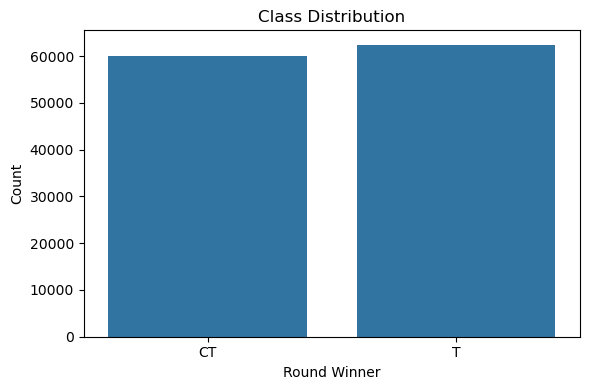

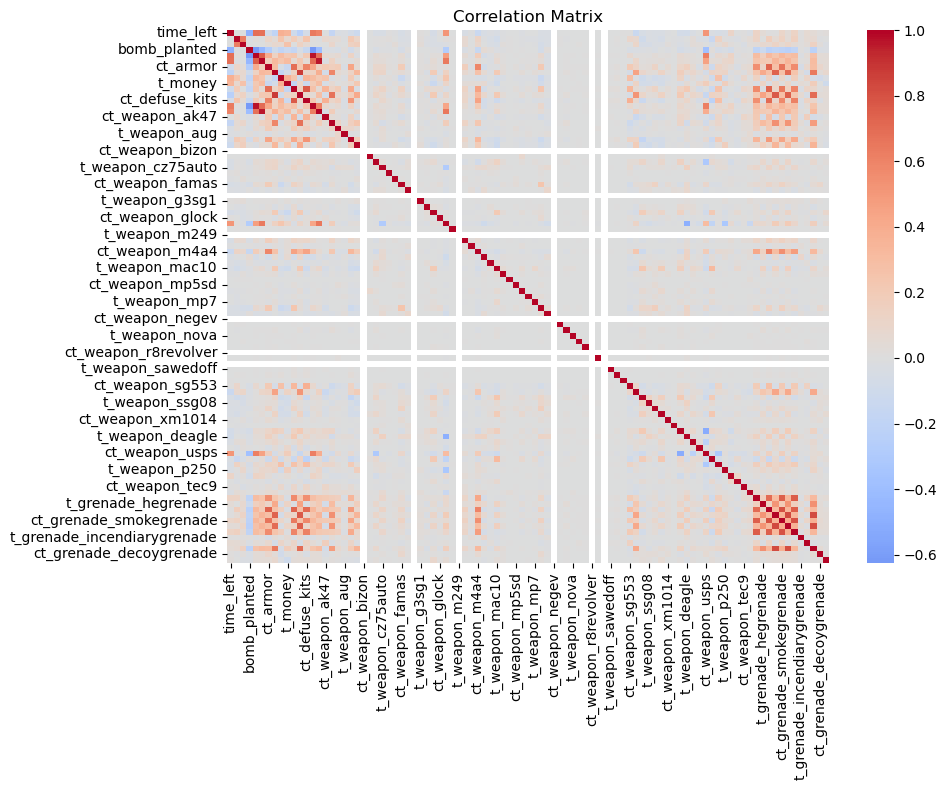

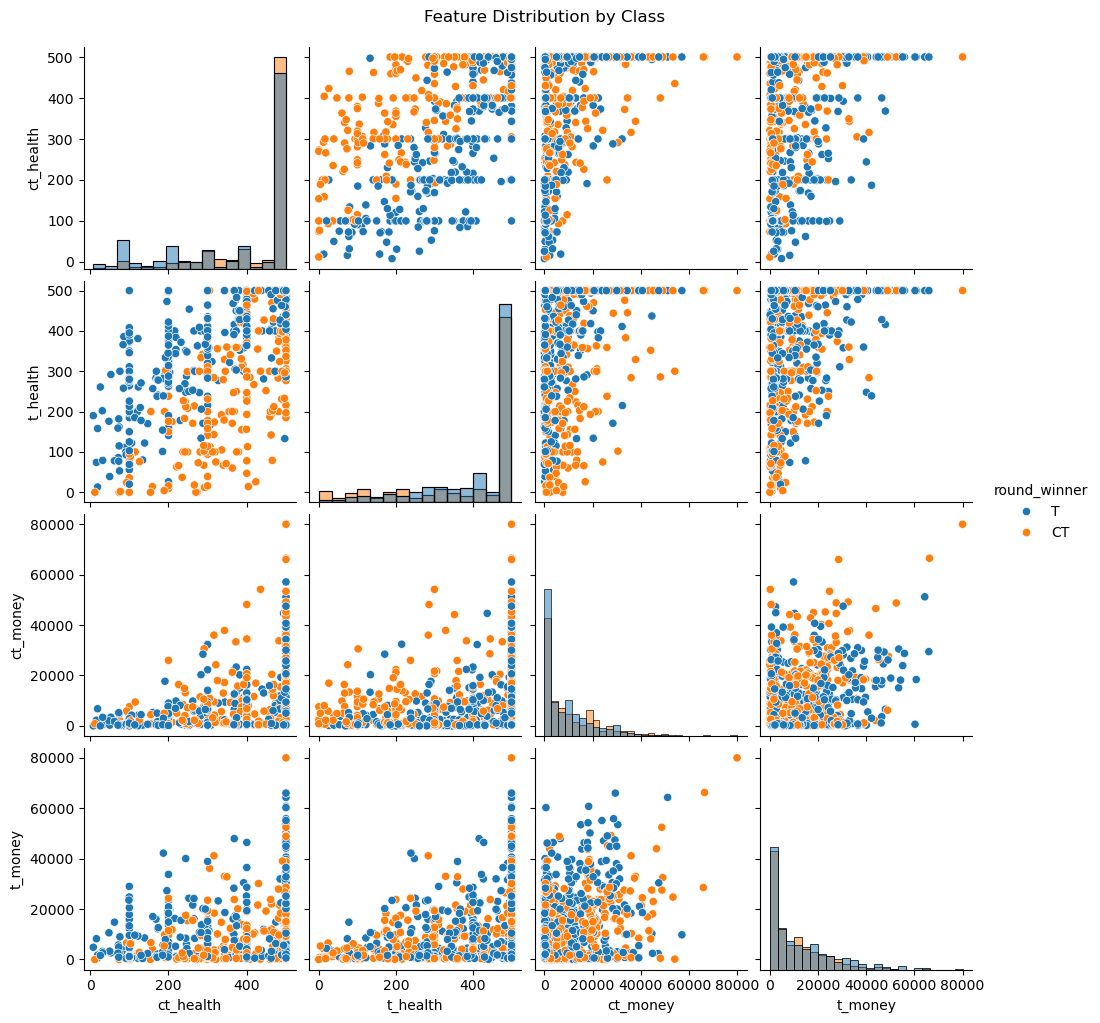

              precision    recall  f1-score   support

          CT       0.85      0.87      0.86     18054
           T       0.87      0.86      0.87     18669

    accuracy                           0.86     36723
   macro avg       0.86      0.86      0.86     36723
weighted avg       0.86      0.86      0.86     36723



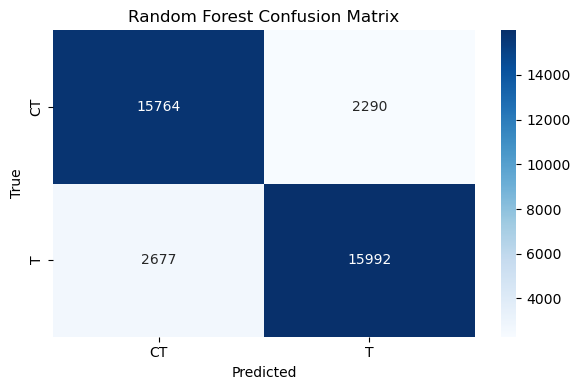

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

          CT       0.85      0.87      0.86     18054
           T       0.87      0.86      0.87     18669

    accuracy                           0.86     36723
   macro avg       0.86      0.86      0.86     36723
weighted avg       0.86      0.86      0.86     36723



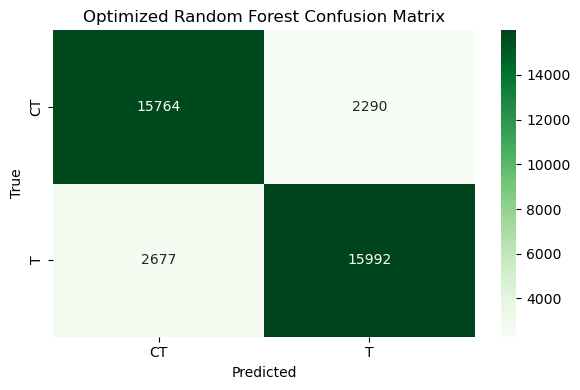

Default Random Forest Accuracy: 0.8647441657816627
Optimized Random Forest Accuracy: 0.8647441657816627
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Optimization did not improve the model.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv(r"D:\Uknord5he\BH3\ml_course\3\csgo_round_snapshots.csv")
df = df.dropna()
df.head()


# 2 3
df.info()
df.describe()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='round_winner')
plt.title("Class Distribution")
plt.xlabel("Round Winner")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

features_to_plot = ['ct_health', 't_health', 'ct_money', 't_money']
df_sample = df[features_to_plot + ['round_winner']].sample(1000)

sns.pairplot(df_sample, hue='round_winner', diag_kind='hist')
plt.suptitle("Feature Distribution by Class", y=1.02)
plt.show()

# 4
class_mapping = {'CT': 0, 'T': 1}
rev_class_mapping = {v: k for k, v in class_mapping.items()}

X = df.drop(columns=['map', 'round_winner'])
y = df['round_winner'].map(class_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#5
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred_rf, target_names=rev_class_mapping.values()))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', xticklabels=rev_class_mapping.values(), yticklabels=rev_class_mapping.values(), cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()
#6
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best Parameters:", grid_rf.best_params_)
print(classification_report(y_test, y_pred_best_rf, target_names=rev_class_mapping.values()))

conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', xticklabels=rev_class_mapping.values(), yticklabels=rev_class_mapping.values(), cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Optimized Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()
#7

print("Default Random Forest Accuracy:", rf_clf.score(X_test, y_test))
print("Optimized Random Forest Accuracy:", best_rf.score(X_test, y_test))

print("Best Parameters:", grid_rf.best_params_)

if best_rf.score(X_test, y_test) > rf_clf.score(X_test, y_test):
    print("Optimization improved the model.")
else:
    print("Optimization did not improve the model.")



1.Class Distribution — Розподіл кількості виграшів між сторонами (КТ і Т) у всіх раундах.

2. Correlation Matrix - Матриця кореляцій між числовими ознаками, яка показує, як ознаки пов’язані між собою.

3. Pairplot - Графік попарного розподілу обраних ознак для сторін КТ і Т.

4.Random Forest Confusion Matrix - Матриця помилок для моделі Random Forest, що показує кількість правильних і неправильних передбачень для кожної сторони.

5. Optimized Random Forest Confusion Matrix - Матриця помилок для оптимізованої моделі Random Forest після підбору гіперпараметрів.
